# Description

It analyzes how clusters of traits were grouped across the ensemble partitions. For example, a stable cluster (obtained from consensus partitions) of cardiovascular diseases can show that all traits were always grouped together across all partitions of the ensemble; another cluster might show that some traits were clustered more often than others, representing a less stable group of traits.

**TODO:** This section of the notebook will be updated again when I start actively writing the results section of the manuscript. Here I left some code as example for some clusters.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name
import conf

# Settings

In [3]:
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/consensus_clustering')

## Load data

In [4]:
INPUT_SUBSET = "umap"

In [5]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [6]:
DR_OPTIONS = {
    "n_components": 5,
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [7]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_5-n_neighbors_15-random_state_0.pkl')

'umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_5-n_neighbors_15-random_state_0'

In [8]:
data_umap = pd.read_pickle(input_filepath)

In [9]:
data_umap.shape

(3749, 5)

In [10]:
data_umap.head()

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
100001_raw-Food_weight,-8.437452,1.664409,9.233617,6.944210,16.781176
100002_raw-Energy,-8.388347,1.670845,9.251021,6.975690,16.698511
100003_raw-Protein,-8.424020,1.696144,9.226449,6.970763,16.768959
100004_raw-Fat,-8.393674,1.685311,9.258855,6.992673,16.728815
100005_raw-Carbohydrate,-8.427763,1.685172,9.234971,6.967204,16.751522


# Load best partitions

In [11]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
display(input_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/consensus_clustering/best_partitions_by_k.pkl')

In [12]:
best_partitions = pd.read_pickle(input_file)

In [13]:
best_partitions.shape

(59, 4)

In [14]:
best_partitions.head()

,method,partition,ami_mean,selected
k,,,,
11,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301839,True
10,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301738,True
9,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301301,True
4,eac_complete_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.300385,True
8,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.300171,True


# Load coassociation matrix

In [15]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "ensemble_coassoc_matrix.npy").resolve()
display(input_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/consensus_clustering/ensemble_coassoc_matrix.npy')

In [16]:
coassoc_matrix = np.load(input_file)

In [17]:
coassoc_matrix = pd.DataFrame(
    data=1.0 - coassoc_matrix,
    index=data_umap.index.copy(),
    columns=data_umap.index.copy(),
)

In [18]:
coassoc_matrix.shape

(3749, 3749)

In [19]:
coassoc_matrix.head()

,100001_raw-Food_weight,100002_raw-Energy,100003_raw-Protein,100004_raw-Fat,100005_raw-Carbohydrate,100006_raw-Saturated_fat,100007_raw-Polyunsaturated_fat,100008_raw-Total_sugars,100009_raw-Englyst_dietary_fibre,100010-Portion_size,...,visual impairment,vitiligo,vitreous body disease,vocal cord polyp,voice disorders,wellbeing measurement AND family relationship,wheezing,whooping cough,worry measurement,wrist fracture
100001_raw-Food_weight,1.000000,0.943614,0.945879,0.923234,0.942029,0.923687,0.925045,0.941576,0.944520,0.432971,...,0.395777,0.397645,0.404983,0.396513,0.416214,0.451043,0.310512,0.400136,0.338514,0.332428
100002_raw-Energy,0.943614,1.000000,0.972600,0.954937,0.978261,0.954257,0.932518,0.968976,0.951766,0.439312,...,0.393960,0.395607,0.405210,0.393342,0.412817,0.428377,0.313047,0.398551,0.339886,0.334692
100003_raw-Protein,0.945879,0.972600,1.000000,0.952899,0.982111,0.952219,0.935236,0.967844,0.948822,0.442255,...,0.397366,0.398324,0.407022,0.396286,0.416667,0.427697,0.309590,0.401947,0.338743,0.337183
100004_raw-Fat,0.923234,0.954937,0.952899,1.000000,0.954031,0.995471,0.953125,0.971241,0.941576,0.449049,...,0.410082,0.409873,0.421065,0.403986,0.427310,0.413871,0.308207,0.411232,0.332571,0.333333
100005_raw-Carbohydrate,0.942029,0.978261,0.982111,0.954031,1.000000,0.953578,0.931839,0.974411,0.949955,0.440670,...,0.393960,0.395380,0.406116,0.394701,0.413723,0.424751,0.313509,0.399004,0.342857,0.337183


The coassociation matrix shows the percentage of times a pair of traits was clustered together across the ensemble partitions.

## Stats

Here I show some general stats of the coassociation matrix, useful to compare results below. For instance, if a pair of traits got clustered together 61% of the times, how strong is that?

In [20]:
df = coassoc_matrix.where(np.triu(np.ones(coassoc_matrix.shape)).astype(np.bool))
df = df.stack().reset_index()

coassoc_matrix_stats = df[0].describe(
    percentiles=[0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]
)

[2021-02-23 23:03:39,895 - numexpr.utils] INFO: NumExpr defaulting to 4 threads.


In [21]:
coassoc_matrix_stats.apply(str)

count               7029375.0
mean       0.4472588055384588
std       0.11464582654691324
min      0.002516778523489971
25%        0.3971983732489833
50%       0.48441734417344173
75%         0.516945323090827
80%        0.5239385727190605
90%        0.5433604336043361
95%        0.5630081300813008
99%        0.6309846431797651
max                       1.0
Name: 0, dtype: object

On average, a pair of clusters appear together in 45% of the clusters in the ensemble (the median is 48%). That makes sense, since for some partitions the resolution (number of clusters) might not be enough to get smaller clusters.

# Plot coassociation values

## Functions

In [22]:
from IPython.display import HTML

In [23]:
def plot_cluster(data, partition, cluster_number, figsize=None):
    k = np.unique(partition).shape[0]

    display(HTML(f"<h3>Cluster {k}.{cluster_number}</h3>"))

    k_traits = data.loc[partition == cluster_number].index

    with sns.plotting_context("paper"):
        f, ax = plt.subplots(figsize=figsize)  # (figsize=(8, 8))

        display(
            sns.heatmap(
                data=coassoc_matrix.loc[k_traits, k_traits],
                vmin=coassoc_matrix_stats["50%"],
                vmax=1.0,
                annot=True,
                fmt=".2f",
                square=True,
            )
        )

In [24]:
k = 5
display(HTML(f"<h2>k: {k}</h2>"))
display(best_partitions.loc[k])

part = best_partitions.loc[k, "partition"]
part_stats = pd.Series(part).value_counts()
display(part_stats)

method                              eac_average_coassoc_matrix
partition    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
ami_mean                                               0.29829
selected                                                  True
Name: 5, dtype: object

0    3641
1      47
3      41
2      12
4       8
dtype: int64

<AxesSubplot:>

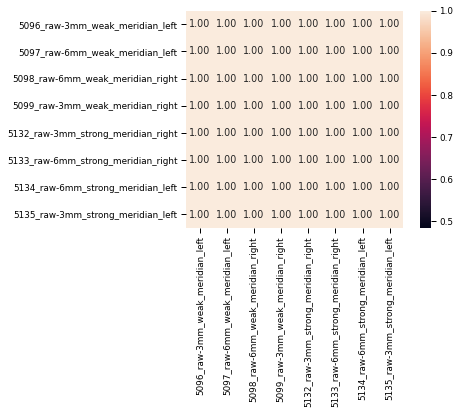

In [25]:
plot_cluster(data_umap, part, 4)

The plot above shows that these 8 keratometry measurements (such as 3mm weak meridian left) were always clustered together in all partitions of the ensemble, representing a very strong/stable grouping.

<AxesSubplot:>

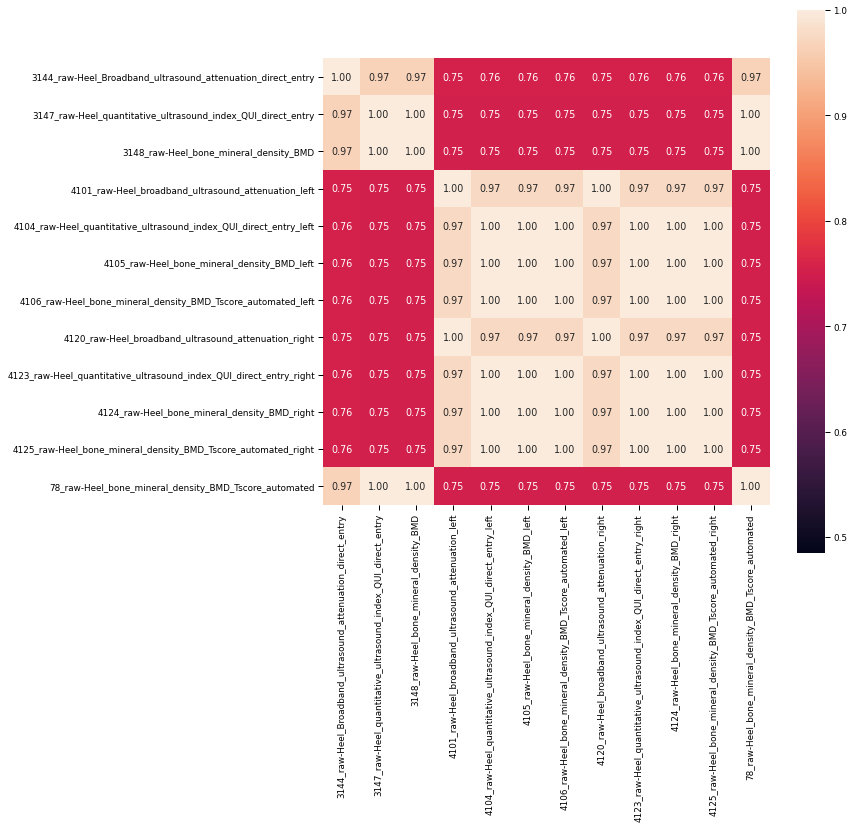

In [26]:
plot_cluster(data_umap, part, 2, figsize=(10, 10))

The "heel bone mineral density" cluster is not as strong as the keratometry one, since some trait pairs have a coassociation value of 0.75. However, 0.75 is quite higher than the 99 percentile of the coassociation values (which is 0.63).